<a href="https://colab.research.google.com/github/Tejaswi0610/Explainble-AI/blob/main/EAI(P2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Random Forest Accuracy: 0.8300

Classification Report:
               precision    recall  f1-score   support

        High       0.86      0.83      0.85        36
         Low       0.90      0.90      0.90        30
      Medium       0.74      0.76      0.75        34

    accuracy                           0.83       100
   macro avg       0.83      0.83      0.83       100
weighted avg       0.83      0.83      0.83       100



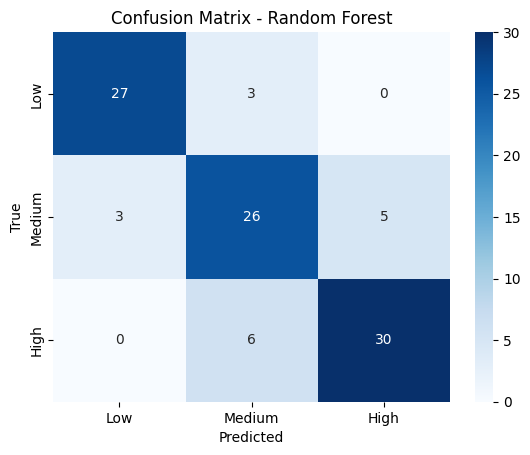

/tmp/ipython-input-1287798504.py:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=importances.index, palette="viridis")


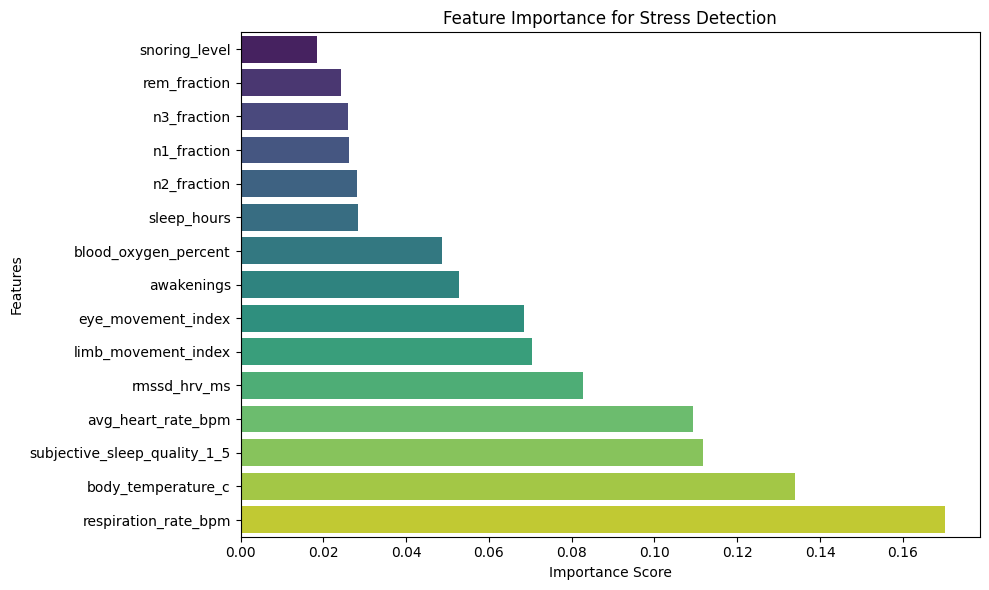

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Logistic Regression Accuracy: 0.8600
Voting Ensemble Accuracy: 0.8200
Deep Learning (MLP) Accuracy: 0.8800

Model Comparison Table:
                  Model  Accuracy
0        Random Forest      0.83
1  Logistic Regression      0.86
2      Voting Ensemble      0.82
3   MLP Neural Network      0.88


/tmp/ipython-input-1287798504.py:114: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="Accuracy", data=model_results, palette="mako")


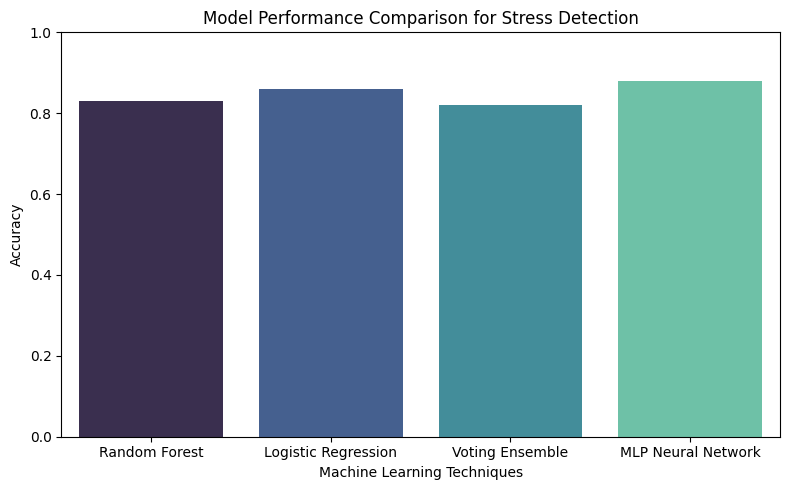

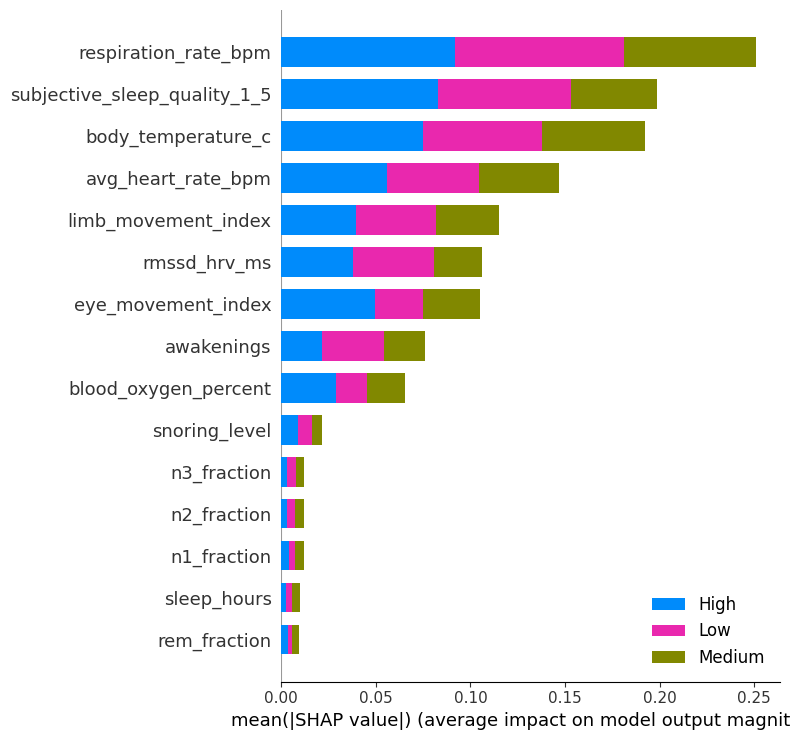

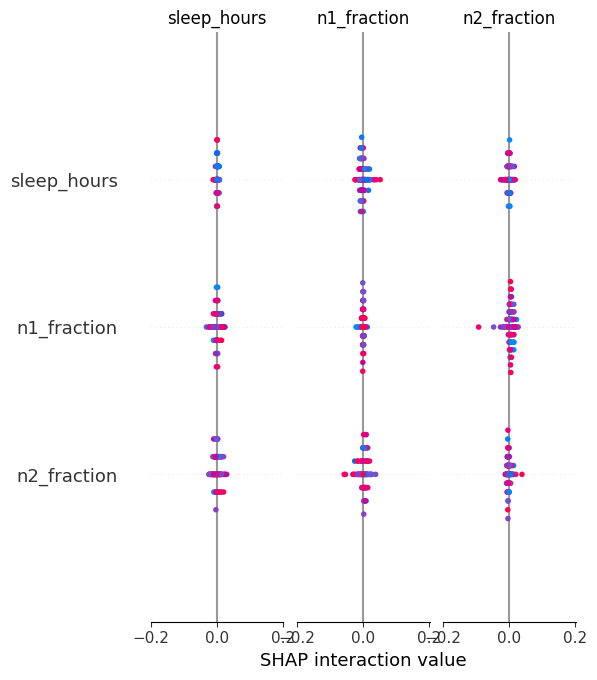

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Explanation for instance 5:


In [6]:
# ==========================================================
# 🧠 Stress Detection from Heart Rate & Sleep Data (Wearables)
# ==========================================================

# ------------------------- IMPORTS -------------------------
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import shap
import lime.lime_tabular

# ------------------------- 1. LOAD DATA -------------------------
df = pd.read_csv("human_stress_sleep_dataset.csv")

features = [
    "sleep_hours", "n1_fraction", "n2_fraction", "n3_fraction", "rem_fraction",
    "avg_heart_rate_bpm", "rmssd_hrv_ms", "respiration_rate_bpm",
    "blood_oxygen_percent", "body_temperature_c",
    "snoring_level", "limb_movement_index", "eye_movement_index", "awakenings",
    "subjective_sleep_quality_1_5"
]

X = df[features]
y = df["stress_label"]

# ------------------------- 2. TRAIN-TEST SPLIT -------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ------------------------- 3. RANDOM FOREST (ENSEMBLE MODEL) -------------------------
clf = RandomForestClassifier(n_estimators=200, random_state=42)
clf.fit(X_train, y_train)

# ------------------------- 4. MODEL EVALUATION -------------------------
y_pred = clf.predict(X_test)
rf_acc = accuracy_score(y_test, y_pred)

print(f"Random Forest Accuracy: {rf_acc:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=["Low", "Medium", "High"])
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Low", "Medium", "High"],
            yticklabels=["Low", "Medium", "High"])
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# ------------------------- 5. FEATURE IMPORTANCE -------------------------
importances = pd.Series(clf.feature_importances_, index=features).sort_values(ascending=True)

plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=importances.index, palette="viridis")
plt.title("Feature Importance for Stress Detection")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

# ==========================================================
# 6. 🔹 REGRESSION, ENSEMBLE & DEEP LEARNING TECHNIQUES
# ==========================================================

# ----- Regression-Based Technique -----
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)
y_pred_logreg = log_reg.predict(X_test)
logreg_acc = accuracy_score(y_test, y_pred_logreg)
print(f"\nLogistic Regression Accuracy: {logreg_acc:.4f}")

# ----- Ensemble Machine Learning Techniques -----
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier

gb_clf = GradientBoostingClassifier(random_state=42)
ada_clf = AdaBoostClassifier(random_state=42)

voting_clf = VotingClassifier(
    estimators=[('rf', clf), ('gb', gb_clf), ('ada', ada_clf)],
    voting='hard'
)
voting_clf.fit(X_train, y_train)
y_pred_voting = voting_clf.predict(X_test)
voting_acc = accuracy_score(y_test, y_pred_voting)
print(f"Voting Ensemble Accuracy: {voting_acc:.4f}")

# ----- Deep Learning Algorithm (MLP Neural Network) -----
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(64, 32), activation='relu', solver='adam',
                    max_iter=500, random_state=42)
mlp.fit(X_train, y_train)
y_pred_mlp = mlp.predict(X_test)
mlp_acc = accuracy_score(y_test, y_pred_mlp)
print(f"Deep Learning (MLP) Accuracy: {mlp_acc:.4f}")

# ==========================================================
# 7. 📊 MODEL PERFORMANCE COMPARISON
# ==========================================================
model_results = pd.DataFrame({
    "Model": ["Random Forest", "Logistic Regression", "Voting Ensemble", "MLP Neural Network"],
    "Accuracy": [rf_acc, logreg_acc, voting_acc, mlp_acc]
})

print("\nModel Comparison Table:\n", model_results)

# Bar Chart for Model Accuracies
plt.figure(figsize=(8, 5))
sns.barplot(x="Model", y="Accuracy", data=model_results, palette="mako")
plt.title("Model Performance Comparison for Stress Detection")
plt.ylim(0, 1)
plt.ylabel("Accuracy")
plt.xlabel("Machine Learning Techniques")
plt.tight_layout()
plt.show()

# ==========================================================
# 8. 🔍 SHAP (Model Explainability)
# ==========================================================
explainer_shap = shap.TreeExplainer(clf)
shap_values = explainer_shap.shap_values(X_test)

# SHAP summary plots
shap.summary_plot(shap_values, X_test, plot_type="bar", class_names=clf.classes_)
shap.summary_plot(shap_values, X_test, class_names=clf.classes_)

# ==========================================================
# 9. 💡 LIME (Local Interpretability)
# ==========================================================
lime_explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train.values,
    feature_names=features,
    class_names=clf.classes_,
    mode="classification"
)

# Explain one test instance
i = 5  # change the index for different samples
exp = lime_explainer.explain_instance(
    data_row=X_test.iloc[i].values,
    predict_fn=clf.predict_proba
)
print(f"Explanation for instance {i}:")
exp.show_in_notebook(show_table=True, show_all=False)


In [5]:
%pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 16.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=4b6c4f8d6a37f3172add305227ccebb46a9ee10002db0e5453dd5678b7af7963
  Stored in directory: /root/.cache/pip/wheels/e7/5d/0e/4b4fff9a47468fed5633211fb3b76d1db43fe806a17fb7486a
Successfully built lime
